## 2) Load training dataset

In [ ]:
# load data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, models, transforms

from torch.utils.data import DataLoader, Dataset

np.random.seed(42)
torch.manual_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cs 412/homework3cs412/CelebA30k.csv') # enter the file path on your drive for the csv file
data.head()

,filename,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
smile_data = data[['filename', 'Smiling']].copy()
smile_data.head()

,filename,Smiling
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
import os

zip_path = "/content/drive/MyDrive/cs 412/homework3cs412/CelebA30k.zip"
target_dir = "/content/data/CelebA30k"

if not os.path.exists(target_dir):
    print("Extracting dataset")
    !unzip -q "{zip_path}" -d "/content/data"
    print("Extraction complete")
else:
    print("Dataset already extracted, skipping unzip.")

img_dir = target_dir
print("Using dataset at:", img_dir)

Extracting dataset
Extraction complete
Using dataset at: /content/data/CelebA30k


In [ ]:
data.columns

Index(['filename', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [ ]:
first_image_path = os.path.join("/content/data/CelebA30k/", smile_data.loc[0,"filename"])
img = Image.open(first_image_path)

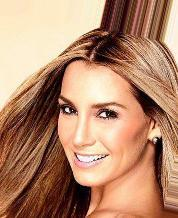

In [ ]:
img

## 3) Visualizing/Understanding the dataset

- Display five random images together with their smiling labels.
- Display statistics about the dataset, such as the distribution of smiling vs. not-smiling samples and any other attributes that you find informative.


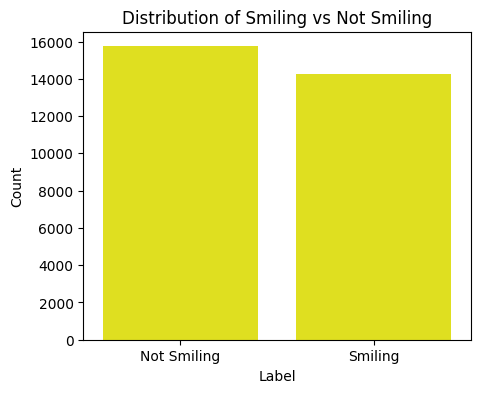

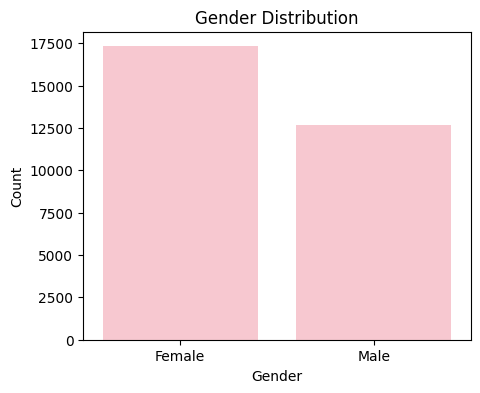

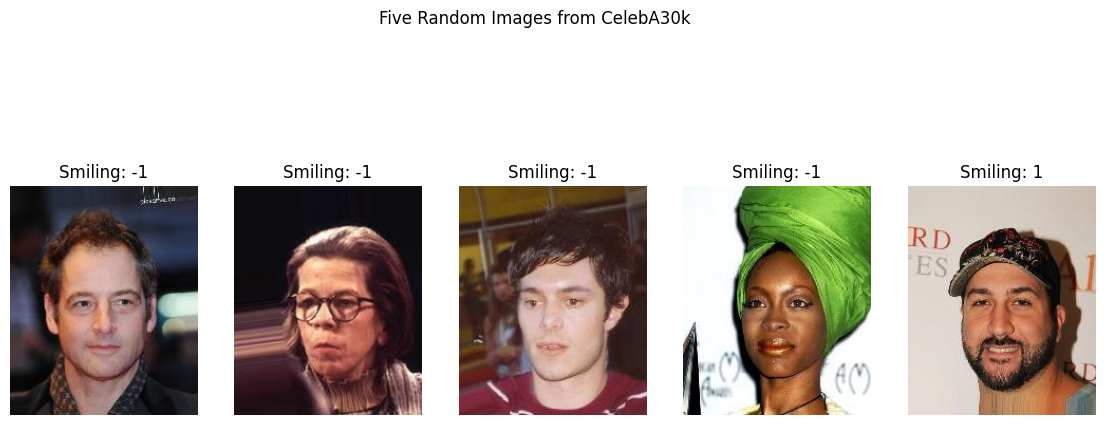

Total samples: 30000
Smiling rate: 0.4753
Male rate: 0.4226666666666667

Smiling by Gender:
SmilingBin         0         1
MaleBin                       
0           0.464954  0.535046
1           0.606309  0.393691


In [ ]:
### visualizations of the dataset

import seaborn as sns
import matplotlib.pyplot as plt

# create the smiling binary column
data['SmilingBin'] = (data['Smiling'] == 1).astype(int)



### distribution of smiling vs not smiling
plt.figure(figsize=(5,4))
sns.countplot(x=data['SmilingBin'], color= "yellow")
plt.xticks([0,1], ["Not Smiling", "Smiling"])
plt.title("Distribution of Smiling vs Not Smiling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# show distribution of another attribute
# male gender will be used as done in the recitation

data['MaleBin'] = (data['Male'] == 1).astype(int)

plt.figure(figsize=(5,4))
sns.countplot(x=data['MaleBin'] , color="pink")
plt.xticks([0,1], ["Female", "Male"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



# display 5 random images with smiling labels
plt.figure(figsize=(14,6))

samples = data.sample(5, random_state=42)

for i, (_, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(img_dir, row['filename'])
    img = Image.open(img_path).convert("RGB")

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Smiling: {row['Smiling']}")

plt.suptitle("Five Random Images from CelebA30k")
plt.show()


### print few informative statistics

print("Total samples:", len(data))
print("Smiling rate:", data['SmilingBin'].mean())
print("Male rate:", data['MaleBin'].mean())
print("\nSmiling by Gender:")
print(pd.crosstab(data['MaleBin'], data['SmilingBin'], normalize='index'))



## 4) Split the dataset as train (80%), validation (10%) and test (10%) set.

> Add blockquote



In [ ]:
# splitting the dataset into Train (80%), Val (10%), Test (10%)

from sklearn.model_selection import train_test_split

# classify smiling, so filename + SmilingBin is used
split_data = data[['filename', 'SmilingBin']].copy()

# split into 80% train + 20% temp
train_df, temp_df = train_test_split(
    split_data,
    test_size=0.20,
    random_state=42,
    stratify=split_data['SmilingBin']
)

# split the temp into 10% val + 10% test
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.50,
    random_state=42,
    stratify=temp_df['SmilingBin']
)

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

# quick check for proportions
print("\nLabel distribution (should be similar):")
print("Train:", train_df['SmilingBin'].value_counts(normalize=True))
print("Val:  ", val_df['SmilingBin'].value_counts(normalize=True))
print("Test: ", test_df['SmilingBin'].value_counts(normalize=True))


Train size: 24000
Validation size: 3000
Test size: 3000

Label distribution (should be similar):
Train: SmilingBin
0    0.524708
1    0.475292
Name: proportion, dtype: float64
Val:   SmilingBin
0    0.524667
1    0.475333
Name: proportion, dtype: float64
Test:  SmilingBin
0    0.524667
1    0.475333
Name: proportion, dtype: float64


## 5) Preparing the Data

1. Defines appropriate transformations using `torchvision.transforms` for the training and validation sets
   - Resizes images to 224x224
   - Converts them to tensors
   - Normalizes them (you can use `[0.5, 0.5, 0.5]` for simplicity)
   - Includes `RandomHorizontalFlip` and a light `ColorJitter` (e.g., low brightness/contrast adjustments) for the training set to satisfy the augmentation requirement
2. Written a custom `Dataset` class that reads images and smiling labels from the dataframe
3. Creates `DataLoader` objects for training and validation with an appropriate batch size.

In [ ]:
# preparing the data

from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# define basic transformations for training set
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),        # data augmentation: 50% chance of horizontal flip, introduces variety in poses
    transforms.ColorJitter(brightness=0.15, contrast=0.15),  # light jitter
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5],
                         [0.5, 0.5, 0.5])
])



### create a custom dataset class

class CelebASmileDataset(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        filename = row['filename']
        label = float(row['SmilingBin'])  # ensure float for BCEWithLogitsLoss

        img_path = os.path.join(self.img_dir, filename)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label, dtype=torch.float32)


# create dataset and dataloader objects

train_dataset = CelebASmileDataset(train_df, img_dir, transform=train_transforms)
val_dataset   = CelebASmileDataset(val_df,   img_dir, transform=val_transforms)



# create DataLoader objects

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)

print("Train batches:", len(train_loader), "batch_size:", train_loader.batch_size)
print("Validation batches:", len(val_loader), "batch size:", val_loader.batch_size)


Train batches: 750 batch_size: 32
Validation batches: 94 batch size: 32


## 6) Transfer Learning with VGG-16

We will create the base model from the well-known VGG-16 architecture available in torchvision.models. This model is pretrained on the ImageNet dataset, a large dataset containing 1.4 million images and 1,000 object categories.

In transfer learning, we use the convolutional base of the pretrained model as a feature extractor. However, we do not use the last fully connected layer, which is specific to ImageNet’s 1,000-class classification task. Instead, we will:
- Keep the convolutional layers (which extract general visual features)
- Remove the final classification layer
- Replace it with our own binary classifier (for smiling classification)

This is a common strategy because the layer before the original classification head (the so-called "bottleneck layer") retains high-level, general features useful for a wide range of vision tasks.

### Instructions

1. Loads the VGG-16 model with weights=models.VGG16_Weights.IMAGENET1K_V1 torchvision.models.
2. Replaces the classifier head with a new sequence of layers suitable for binary classification:


In [ ]:
# transfer learning with VGG-16

from torchvision.models import vgg16, VGG16_Weights

# load pretrained VGG-16
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

print("Original VGG16:")
print(model)



# replace the classifier head

# number of input features to the final FC layer
in_features = model.classifier[6].in_features

# replace the final classification layer with our binary output
model.classifier[6] = nn.Linear(in_features, 1)

# move model to device (GPU)
model = model.to(device)

print("\nModified VGG16 for Smiling Classification:")
print(model)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


100%|██████████| 528M/528M [00:02<00:00, 222MB/s]


Original VGG16:
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, paddi

## 7) Fine-Tuning and Training the Model

VGG-16 base model is set up with a new binary classification head, it’s time to fine-tune and train it using `train_loader` and evaluate it using `val_loader`.


- Experiment with the two required fine-tuning strategies:
  - Freeze all convolutional layers and train only the classifier head.
  - Unfreeze the last convolutional block together with the classifier head and fine-tune those parameters while keeping the earlier layers frozen.
- Use `nn.BCEWithLogitsLoss()` as the loss function and choose an appropriate optimizer (e.g., `torch.optim.SGD` or `Adam`).
- For each fine-tuning strategy, train models with `learning rate = 0.0001`). Each configuration must run for exactly 10 epochs with the mandated data augmentation pipeline.
- Implement a training loop that includes validation after each epoch and monitor both training and validation performance across epochs.
- Keep track of the training duration and include it in your reports.
- May adjust batch size depending on available GPU memory, but typically 32 or 64 is suggested.




 Training MODEL A (Frozen CNN)

Epoch 1/10
Train Loss: 0.4183 | Val Loss: 0.3825 | Val Acc: 0.8250

Epoch 2/10
Train Loss: 0.3217 | Val Loss: 0.3343 | Val Acc: 0.8587

Epoch 3/10
Train Loss: 0.2762 | Val Loss: 0.3315 | Val Acc: 0.8600

Epoch 4/10
Train Loss: 0.2396 | Val Loss: 0.3260 | Val Acc: 0.8597

Epoch 5/10
Train Loss: 0.2115 | Val Loss: 0.3535 | Val Acc: 0.8623

Epoch 6/10
Train Loss: 0.1801 | Val Loss: 0.3564 | Val Acc: 0.8570

Epoch 7/10
Train Loss: 0.1610 | Val Loss: 0.3787 | Val Acc: 0.8573

Epoch 8/10
Train Loss: 0.1362 | Val Loss: 0.4135 | Val Acc: 0.8537

Epoch 9/10
Train Loss: 0.1129 | Val Loss: 0.4439 | Val Acc: 0.8530

Epoch 10/10
Train Loss: 0.1021 | Val Loss: 0.4514 | Val Acc: 0.8513


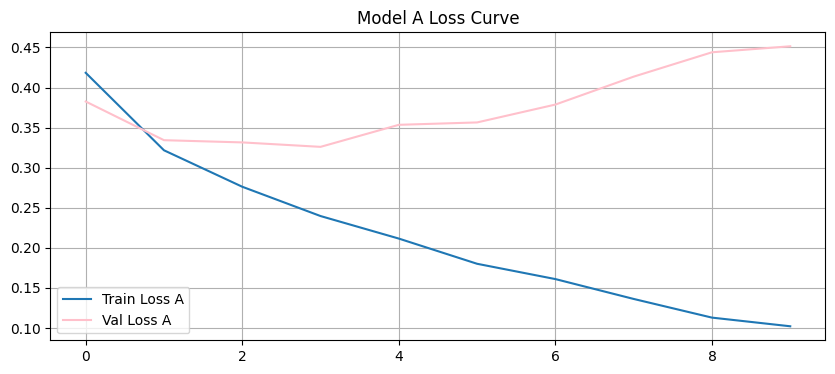

 Training MODEL B (Fine-tune Last Conv Block) 

Epoch 1/10
Train Loss: 0.2637 | Val Loss: 0.1954 | Val Acc: 0.9113

Epoch 2/10
Train Loss: 0.1941 | Val Loss: 0.1815 | Val Acc: 0.9210

Epoch 3/10
Train Loss: 0.1710 | Val Loss: 0.1877 | Val Acc: 0.9257

Epoch 4/10
Train Loss: 0.1526 | Val Loss: 0.1822 | Val Acc: 0.9240

Epoch 5/10
Train Loss: 0.1331 | Val Loss: 0.2589 | Val Acc: 0.9110

Epoch 6/10
Train Loss: 0.1124 | Val Loss: 0.1952 | Val Acc: 0.9220

Epoch 7/10
Train Loss: 0.0927 | Val Loss: 0.2231 | Val Acc: 0.9157

Epoch 8/10
Train Loss: 0.0697 | Val Loss: 0.2606 | Val Acc: 0.9147

Epoch 9/10
Train Loss: 0.0584 | Val Loss: 0.2872 | Val Acc: 0.9070

Epoch 10/10
Train Loss: 0.0463 | Val Loss: 0.2852 | Val Acc: 0.9160


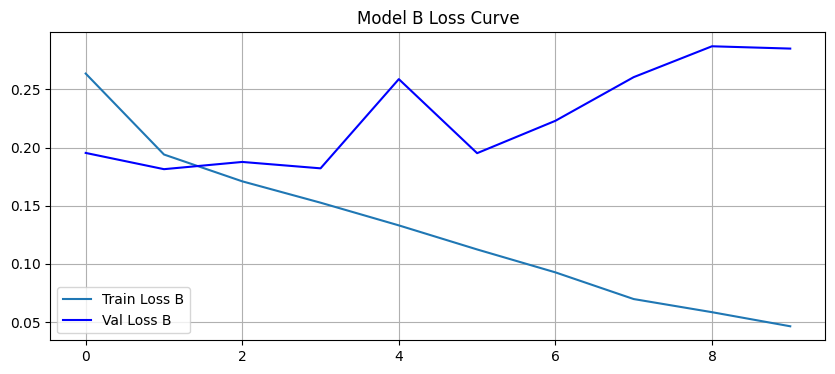

In [ ]:
# fine-tuning and training the model

from torchvision.models import vgg16, VGG16_Weights

#
# MODEL A: Freeze ALL conv layers
#
modelA = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
in_features = modelA.classifier[6].in_features
modelA.classifier[6] = nn.Linear(in_features, 1)

for param in modelA.features.parameters():
    param.requires_grad = False

modelA = modelA.to(device)


#
# MODEL B: Fine-tune only the last conv block
#
modelB = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
in_features = modelB.classifier[6].in_features
modelB.classifier[6] = nn.Linear(in_features, 1)

# freezing convolutional layers
for param in modelB.features.parameters():
    param.requires_grad = False

# unfreeze only the last convolutional block
for i, layer in enumerate(modelB.features):
    if i >= 24:
        for param in layer.parameters():
            param.requires_grad = True

# move to GPU
modelB = modelB.to(device)


# training function
def train_model(model, train_loader, val_loader, epochs=10, lr=1e-4):
    import time
    criterion = nn.BCEWithLogitsLoss() # Binary Cross Entropy that expects logits as input which applies Sigmoid itself
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr) # The optimizer is responsible for updating the model's weights using gradients.


    train_losses, val_losses, val_accs = [], [], []
    start_time = time.time()

    for epoch in range(epochs):
        print(f"\nEpoch {epoch+1}/{epochs}")

        # ----- TRAIN -----
        model.train() # applies dropout, batch normalization etc.
        train_loss_sum = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)  # Move the tensors to GPU memory
            optimizer.zero_grad()
            logits = model(X).squeeze() # removes the redundant dimension with .squeeze
            loss = criterion(logits, y) # computes loss
            loss.backward() # backpropagation
            optimizer.step() # updates each weight
            train_loss_sum += loss.item() * X.size(0)
        train_loss = train_loss_sum / len(train_loader.dataset)

        # ----- VALIDATION -----
        model.eval()
        val_loss_sum = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                logits = model(X).squeeze()
                loss = criterion(logits, y)
                val_loss_sum += loss.item() * X.size(0)
                preds = (torch.sigmoid(logits) > 0.5).long()
                correct += (preds.cpu() == y.cpu().long()).sum().item()
                total += y.size(0)

        val_loss = val_loss_sum / len(val_loader.dataset)
        val_acc = correct / total

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    duration = time.time() - start_time
    return train_losses, val_losses, val_accs, duration


#
# Train MODEL A
#
print(" Training MODEL A (Frozen CNN)")
A_train_loss, A_val_loss, A_val_acc, A_time = train_model(
    modelA, train_loader, val_loader, epochs=10, lr=1e-4
)

plt.figure(figsize=(10,4))
plt.plot(A_train_loss, label="Train Loss A")
plt.plot(A_val_loss, label="Val Loss A", color= "pink")
plt.legend()
plt.title("Model A Loss Curve")
plt.grid(True)
plt.show()

#
# Train MODEL B
#
print(" Training MODEL B (Fine-tune Last Conv Block) ")
modelB = modelB.to(device)
B_train_loss, B_val_loss, B_val_acc, B_time = train_model(
    modelB, train_loader, val_loader, epochs=10, lr=1e-4
)

plt.figure(figsize=(10,4))
plt.plot(B_train_loss, label="Train Loss B")
plt.plot(B_val_loss, label="Val Loss B", color= "blue")
plt.legend()
plt.title("Model B Loss Curve")
plt.grid(True)
plt.show()


## 8) Test classifier on Test set

- Determines the setup with the best performance based on validation set performance.
- Uses model to predict the labels of the test set and report the final accuracy.
- Displays the confusion matrix.
- Displays 5 correct, 5 incorrect classifications.
- Includes the findings in report, and ensure that the distinction between training and test results is clearly distinguishable.


Test batches: 94

Selected Model: B (Fine-tuned Last Conv Block)

Final Test Accuracy: 0.9177


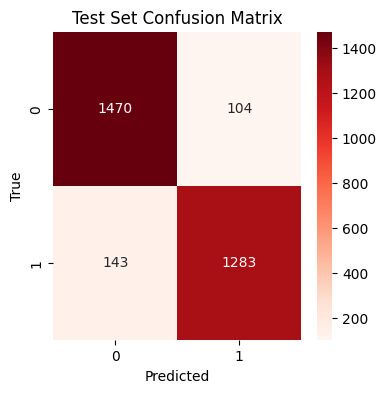

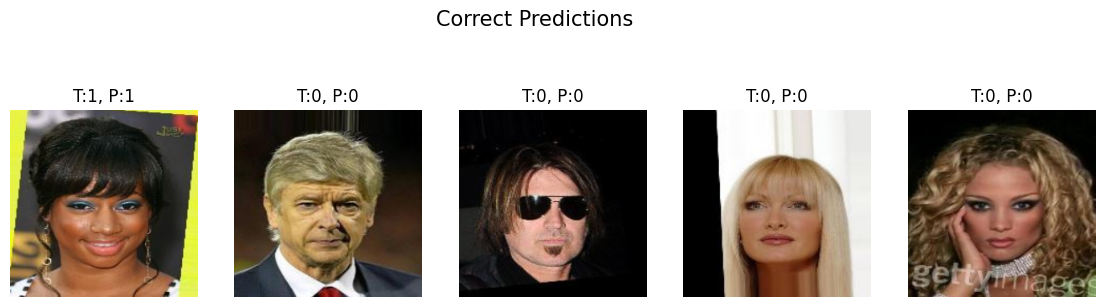

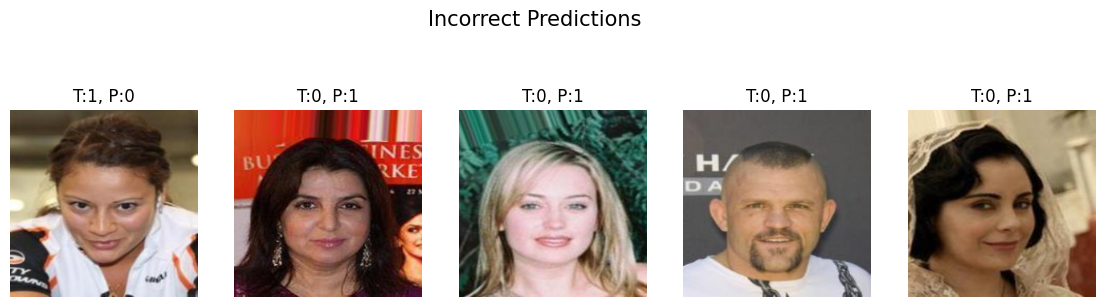

In [ ]:
# test the classifier on test set

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

#
# create test dataset & loader
#
test_dataset = CelebASmileDataset(test_df, img_dir, transform=val_transforms)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False
)

print("Test batches:", len(test_loader))


#
# selecting the best model based on Validation Accuracy

bestA = max(A_val_acc)
bestB = max(B_val_acc)

if bestB > bestA:
    best_model = modelB
    print("\nSelected Model: B (Fine-tuned Last Conv Block)")
else:
    best_model = modelA
    print("\nSelected Model: A (Frozen CNN)")


# evaluate on test set

true_labels = []
pred_labels = []
images = []

best_model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)

        logits = best_model(X).squeeze()
        preds = (torch.sigmoid(logits) > 0.5).long()

        correct += (preds.cpu() == y.cpu().long()).sum().item()
        total += y.size(0)

        true_labels.extend(y.cpu().long().tolist())
        pred_labels.extend(preds.cpu().tolist())
        images.extend(X.cpu())

test_acc = correct / total
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


# confusion Matrix

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Set Confusion Matrix")
plt.show()


# show 5 correct & 5 incorrect predictions

import random

correct_idx = [i for i in range(len(true_labels)) if true_labels[i] == pred_labels[i]]
wrong_idx   = [i for i in range(len(true_labels)) if true_labels[i] != pred_labels[i]]

sample_correct = random.sample(correct_idx, min(5, len(correct_idx)))
sample_wrong   = random.sample(wrong_idx,   min(5, len(wrong_idx)))

def unnormalize(img):
    img = img.permute(1,2,0).numpy()
    return np.clip((img * 0.5) + 0.5, 0, 1)

def show_samples(indices, title):
    plt.figure(figsize=(14,4))
    for i, idx in enumerate(indices):
        img = unnormalize(images[idx])
        plt.subplot(1,5,i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"T:{true_labels[idx]}, P:{pred_labels[idx]}")
    plt.suptitle(title, fontsize=15)
    plt.show()

show_samples(sample_correct, "Correct Predictions")
show_samples(sample_wrong, "Incorrect Predictions")
